# Introduction to Data Science and Machine Learning
## Jon Landers

## General Assumptions

- Students have the latest Anacaonda (Python distribution) installed.
- Students are generally aware of how Jupyter Notebooks work. They can run them on their local machines.
 - They can load notebooks.
 - Create, manipulate, and run cells of Python code.
- Students can install python libraries using pip.
- Sudents can navigate the python command line to debug issues such as version collissions.
- Students have a general understanding of Git.
 - They can clone repositorities, create new ones, pull changes and manage conflicts, commit and push back to repositories.
 - They have an understanding of repository branching.
- Students have been asked to clone the provided repository locally before class.

## Import the necessary python libraries

In [1]:
import pandas as pd
import operator as op_lib  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import matplotlib.patches as mpatches
from sklearn import datasets, linear_model, kernel_ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Outline of Lab

#### Regression techniques and algorithms play a central role in Data Science. They are applied to numerous use cases in different industries. 

#### Today we will apply Linear Regression to make predictions about the quality of wine. The same techniques used here can be leveraged when analyzing an endless array of creative applications.

#### Throughout the Lab there will be several exercises to complete, varying in degree of difficulty. Here is what you will learn...

#### *Data Analysis of CSV files, typically the standard machine learning format.*
- Using Python and pandas to load and manipulate data
 - Combining datasets
 - Data normalization
- Data Files
 - winequality.names - information about the csv files
 - winequality-red.csv - features of red wine including quality in csv format
 - winequality-white.csv - features of white wine including quality in csv format

#### *Features, Correlations and Visualizations*
- What are features vs. predictions and their relation in the data.
- Using Python and pandas, understand correlations between features and the output. What's important in the data for our predictions?
- Using Python libraries (matplotlib, seaborn) to help accentuate meaning through illustrative visualizations in the analyses and paint a convincing story.
- How does data normalization affect this story.

#### *Forecasting - Linear Regression and Linear Classification*
- What does Linear mean?
- What types of algorithms do Linear Regression and Classification?
- Using Python and sklearn to implement multiple methods of both.
- Using Python and matplotlib to create visualizations.
- How does data normalization affect this story.

#### *Statistical Validation and Accuracy Metrics*
- Cross Validation, 2 Fold vs. N Fold.
 - Important technique to avoid overfitting.
- Using Python, sklearn, and sklearn-metrics-metrics to show some measures of accuracy for predictive models.
 - Coefficient of determination
 - Mean squared error
 - Confusion matrix
 - Precision, Recall, etc.

#### *Additional Feature Engineering*
- Engineered features can often be more predictive.
- We did some of this with the data normalization.
- We also used Python, sklearn, and sklearn-metrics-metrics to obtain category confidence for our classification impelementation. These confidence values can be used as additional features in regression.
- Learning that combines the outputs of multiple algorithms is called Ensemble Learning

## Use the Python library Pandas Dataframes to load the wine data set in CSV format. This is a great library for manipulating data in general.

#### Wine Data
- The UCI machine learning repository is a great source of datasets pertaining to various machine learning tasks
 - https://archive.ics.uci.edu/ml/datasets/Wine+Quality
 - Do some browsing of what is out there.
- The wine data is also available in the GitHub Reposoitory.

#### Pandas Dataframe documentation
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

## Exercises

#### Exercise 1
- Write some code to join the two wine sets (red and white) and display them as one

#### Exercise 2
- Write original files back to disk with a comma delimiter instead of semi-colon

In [2]:
# Load red and white
winered = pd.read_csv('winequality-red.csv', delimiter=';')
winewhite = pd.read_csv('winequality-white.csv', delimiter=';') # delimeter is updated

# Print the redy and white datasets
print('First few rows of red wine dataset')
display(winered.head())
print('First few rows of white wine dataset')
display(winewhite.head())

# Union red and white - SQL like commands can often be run with Pandas
#pd.merge(wine, df2, on='fips')
# EXERCISE 1 - Write some code to join the two sets and display them as one
print('Red and white wine datasets combined')
winered['type'] = 'red'
winewhite['type'] = 'white' # Think about how the type column might lend itself more toward mathmatical computations
wineredandwhite = pd.concat([winered, winewhite], ignore_index=True)
display(wineredandwhite)

# Standard csv format in case needed elsewhere
# EXERCISE 2 - Write original files back to disk with a comma delimiter instead of semi-colon
#winered.to_csv('winequality-red-2.csv')
#winewhite.to_csv('winequality-white-2.csv')

First few rows of red wine dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First few rows of white wine dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Red and white wine datasets combined


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


## Data Analysis and Normalization

#### Data normalization is important to many facets of machine learning and data science problems. The function below will normalize a DataFrame over each column / feature between 0 and 1. There are many methods for data normalization.
- https://en.wikipedia.org/wiki/Feature_scaling

\begin{align}
x' = a + \frac{(x - min(\boldsymbol{x}))(b-a)}{max(\boldsymbol{x})-min(\boldsymbol{x})}
\end{align}

\begin{align}
a=desired min, b = desired max
\end{align}

#### A recurring theme in the process will be the analysis of data in different scenarios. This theme applies to all data science problems.


In [3]:
def min_max_norm(regr_data):

    # normalize data
    # norm all features
    norm_values_all_data = []
    for a in range(0, len(regr_data.values)):
        vals = regr_data.values[a]
        minc = np.amin(vals)
        maxc = np.amax(vals)
        norm_vals = []
        desired_min = 0
        desired_max = 1
        for a in range(0, len(vals)):
            a1 = vals[a]
            a2 = a1 - minc
            a2 = a2 #* 2
            denom = maxc-minc
            a2 = (a2/denom) + desired_min
            norm_vals.append(a2)

        norm_values_all_data.append(norm_vals)      
    regr_data = pd.DataFrame(norm_values_all_data, columns = regr_data.keys())

    return regr_data

# Features, Correlations, Visualizations, Etc.

#### Understanding the available data and how it will help to make predictions is a very important step in the Data Science process. It is often repeated throughout the lifecyle of a project as more in-depth insights are created. Choosing and creating the right features for a problem can be a daunting task often referred to as Feature Selection and Engineering. We'll touch more on the Engineering part later. For now, let's focus on Selection.

#### In the wine dataset presented above we are provided with a set of features (columns and values) to be used in predictions of wine quality, another column with values within the dataset. Each row is a single wine. Which columns are relevant to quality? What combinations of columns will give the best predictions for quality?

#### There are many ways to analyze variable depedence. - https://en.wikipedia.org/wiki/Dependent_and_independent_variables. It turns out we can easily calculate feature correlations and build some expressive visuals around them to help give insight into the dataset. When we build a matrix of correlations between every variables in the dataset it is know as a heatmap. Pandas and DataFrames help calculate the correlations. Matplotlib creates the visuals.
- https://matplotlib.org/

Pearson correlation, one of many measures of variable dependence is used (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

$\boldsymbol{X}$ - all columns in our data set that arent quality.
$\boldsymbol{y}$ - the quality column

The correlation between a column or feature $col_i(\boldsymbol{X})$, in matrix $\boldsymbol{X}$, and the output labels,
$\boldsymbol{y}$, in the population of data is written as:

\begin{align}
\rho_{i,\boldsymbol{y}} = \frac{cov(col_i(\boldsymbol{X}), \boldsymbol{y})}{\sigma_i \sigma_{\boldsymbol{y}}}
\end{align}

The covariance is denoted by $cov()$ and the standard deviation by $\sigma$.

## Exercises

#### Exercise 1
- Run the cell below using all three datasets without the data normalization and note the differences


#### Exercise 2
- Run the cell below using all three datasets with the data normalization and note the differences

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.979308,0.624636,0.976762,0.281280,0.941225,0.102929,0.984979,0.979321,0.983592,0.907024,0.924429
volatile acidity,0.979308,1.000000,0.625629,0.983007,0.284989,0.948392,0.132657,0.991638,0.994648,0.987096,0.913807,0.936134
citric acid,0.624636,0.625629,1.000000,0.629276,-0.541912,0.655504,0.091414,0.625567,0.630747,0.629452,0.579701,0.647417
residual sugar,0.976762,0.983007,0.629276,1.000000,0.280975,0.948645,0.134159,0.988671,0.983024,0.985045,0.913255,0.928684
chlorides,0.281280,0.284989,-0.541912,0.280975,1.000000,0.211690,0.033061,0.293848,0.280509,0.285411,0.268964,0.204783
free sulfur dioxide,0.941225,0.948392,0.655504,0.948645,0.211690,1.000000,0.133575,0.952615,0.946860,0.953526,0.880432,0.924434
total sulfur dioxide,0.102929,0.132657,0.091414,0.134159,0.033061,0.133575,1.000000,0.131546,0.132794,0.132429,-0.219203,0.130376
density,0.984979,0.991638,0.625567,0.988671,0.293848,0.952615,0.131546,1.000000,0.991658,0.992718,0.919704,0.930099
pH,0.979321,0.994648,0.630747,0.983024,0.280509,0.946860,0.132794,0.991658,1.000000,0.987109,0.915642,0.933604
sulphates,0.983592,0.987096,0.629452,0.985045,0.285411,0.953526,0.132429,0.992718,0.987109,1.000000,0.914945,0.937611


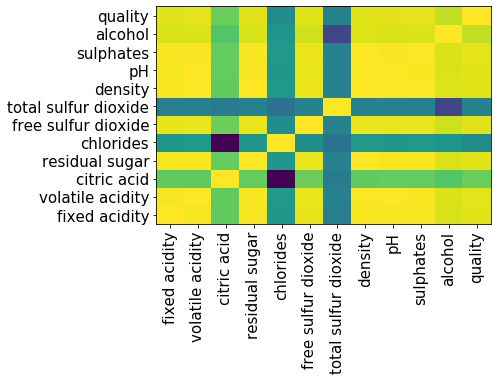

In [4]:
# Show correlations between all features

# EXERCISE 1 and 2 - swap in and out
df = winered
#df = winewhite
#df = wineredandwhite
df = df.drop('type', 1, errors='ignore') 

# EXERCISE 2 - swap in and out
# Normalization
df = min_max_norm(df)

# Compute the Pearson correlations and display them as a DataFrame.
df = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
display(df)

# Plotting Heat Map using MatPlotLib
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=15)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=15)
plt.xticks(rotation=90)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.show()

## Seaborn is a different Python library that can make heat maps

Seanborn documentation
- https://seaborn.pydata.org/

## Exercises

#### Exercise 1
-  Recreate the heat-map above using Seaborn. Modify some parameters. Change colors. Find something aesthetically pleasing that is easy to understand for a general audience. Presentation is very important in industry. Telling a story that is insightful can help make sure everyone is on the same page.

#### Exercise 2
- Once again, try with and without normalization and use all datasets


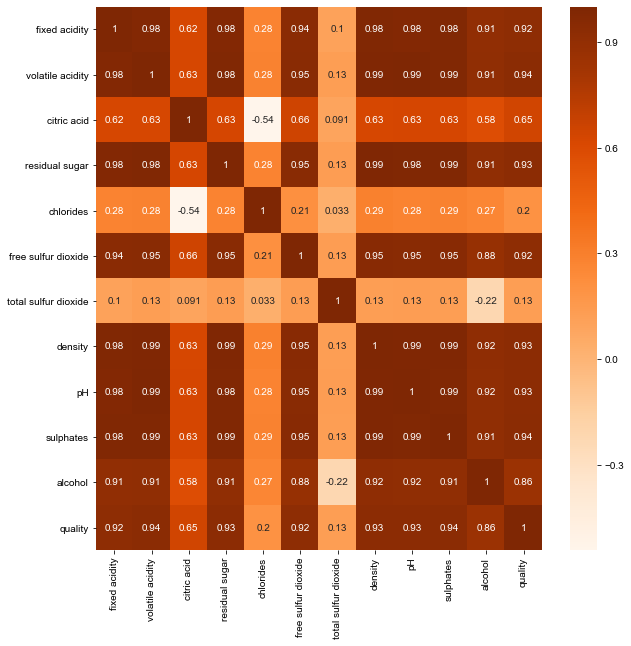

In [5]:
# EXERCISE 1 - Recreate the heat-map above using Seaborn. 
# EXERCISE 2 - Once again, try with and without normalization and use all datasets

df = winered
#df = winewhite
#df = wineredandwhite
df = df.drop('type', 1, errors = 'ignore')
df = min_max_norm(df)
df = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
ax = sns.heatmap(df, cmap="Oranges", annot=True)
sns.set(rc={'figure.figsize':(8,8)})
bottom, top = ax.get_ylim()
f = ax.set_ylim(bottom + 0.5, top - 0.5)

## Correlations to a single feauture and simple bar chart

#### The bar chart is created using the matplotlib Python library. Sometimes it is visually easier to look at a bar chart when only concerned with a single variable.

## Exercises

#### Exercise 1
-  Create a bar chart using matplotlib to display correlations to wine quality (only the 1 column). 

#### Exercise 2
-  Once again, try with and without normalization 

#### Exercise 3
- Sort the quality column of the dataset as a first order sort across all features in the dataset.

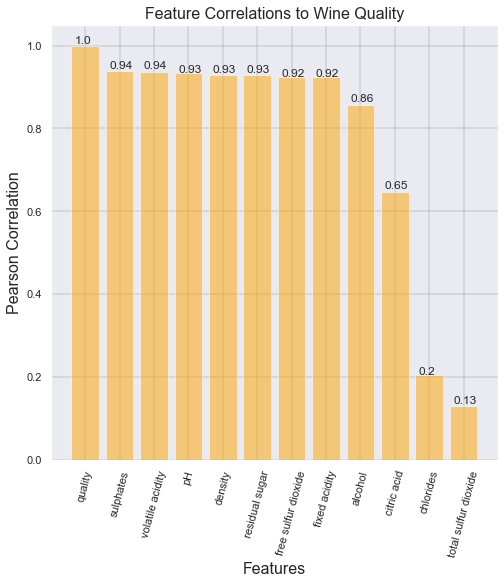

In [6]:

# Sort the values to make things more obvious
# Sorting data often helps to accentuate the point of the visualization which we will see more of.

# EXERCISE 1 - Create a bar chart using matplotlib to display correlations to wine quality (only the 1 column). 
# EXERCISE 2 - Once again, try with and without normalization
df = winered
df = df.drop('type', 1, errors = 'ignore')
df = min_max_norm(df)
df = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

# No Sorting
# objects = np.array(df.keys())
# y_pos = np.arange(len(df.keys()))
# x_performance = list(df['quality'])
# print(objects)
# print(y_pos)
# print(x_performance)

# EXERCISE 3 - Sort the quality column of the dataset as a first order sort across all features in the dataset
# Sort the quality column of the dataset as a first order sort 
# across all features in the dataset.
sorted_corr = df['quality'].sort_values(ascending=False)
objects = np.array(sorted_corr.keys())
y_pos = np.arange(len(objects))
x_performance = list(sorted_corr.values)
# print(objects)
# print(y_pos)
# print(x_performance)

# Plot with matplotlib
bars = plt.bar(y_pos, x_performance, align='center', alpha=0.5, color='orange', zorder = 3)
for bar in bars:
    yval = bar.get_height()
    yval = np.around(yval, decimals = 2)   
    plt.text(bar.get_x() + .1, yval + .005, yval)
    
plt.xticks(y_pos, objects)
plt.ylabel('Pearson Correlation',fontsize=16)
plt.xlabel('Features',fontsize=16)
plt.title('Feature Correlations to Wine Quality',fontsize=16)
plt.grid(color='#696969', linestyle='-', linewidth=.3, zorder = 0)
plt.xticks(rotation=75)
plt.show()


## Forecasting - Regression and Classification 

#### Regression (predicting a number) and Classification (predicting a category) are standard machine learning practices, as previously mentioned. In the examples we have already seen, statistical metrics of accuracy and illustrative visualizations are important parts of the Data Science lifecycle. Python has excellent tools to handle all of this in conjunction with other libaries already introduced
- https://scikit-learn.org/

Other intro material
 - https://en.wikipedia.org/wiki/Supervised_learning
 - https://en.wikipedia.org/wiki/Regression_analysis
 - https://en.wikipedia.org/wiki/Statistical_classification


### Linear Regression 

Keep in mind that not all variables behave in a linear manner. Therefore Linear Regression may not be able to approximate the non-linear nature of some functions such as polynomial, exponential, and logarithmic. In such cases other algorithms and techniques may need to be used. Again, this is why an initial data temperature check is always important.

Here, the wine quality prediction model is built with the sklearn Python library and the algorithm used is the 
method of least squares which is an implementation of Linear Regression (https://en.wikipedia.org/wiki/Least_squares). This produces the prediction function $\psi$. 

$\boldsymbol{X}$ - all columns in our data set that arent quality.
$\boldsymbol{y}$ - the quality column
    
\begin{align}
\boldsymbol{w} = (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y}
\end{align}

\begin{align}
\psi(\boldsymbol{x}_i) = \sum_{r=1}^{k}w_r x_{i,r} + b
\end{align}

The plot showing actuals and predictions is again created using the matplotlib Python library.

NOTE: despite modern libraries and tools that abstract away the mathematical underpinnings of algorithms it can still be important to understand these details.

## Exercises

#### The basic implementation of Linear Regression using sklearn using linear_model.LinearRegression(). The results are plotted using matplotlib We will modify this implementation in multiple ways to analyze the results.

#### Exercise 1
- Modify implemntation to normalize the data as before and see differences in plot.

#### Exercise 2
- Modify implemntation to perform 5 fold cross-validation instead of 2 fold.

#### Exercise 3
- Try various types of regression. All available in sklearn.
 - LinearRegression
 - Ridge Regresion
 - KernelRidge
 - ElasticNet
 
#### Exercise 4 
- Write code to sort data and results on the quality column. Which is easier to read in the graph?

#### Exercise 5 
- Modify code to display regression accuracy metrics
 - Mean Square Error
 - Coefficient of Determination

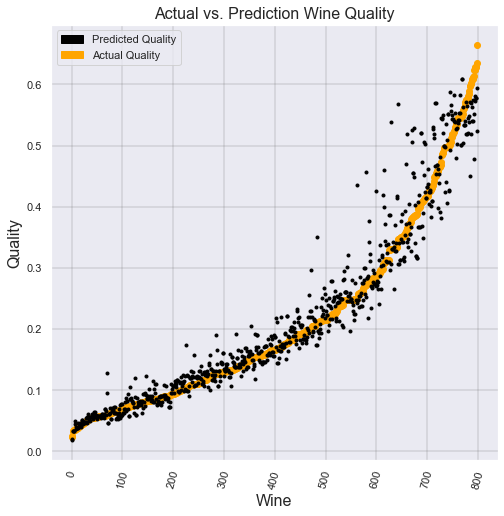

Coefficients / Weights used in the calculation of the predictions:


array([ 0.03377376, -1.70008225, -0.18386675,  0.01402681,  0.27648475,
        0.01978589, -0.09652374,  1.63362794,  0.25620133,  1.04973933,
        0.30381698])

Incercept: 



0.09047256260835526

Metrics of accuracy of the model - https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
Mean squared error: 0.00
Coefficient of determination: 0.94


In [7]:
# Regression Dataset
regr_data = winered
# regr_data = winewhite
# regr_data = wineredandwhite - EXERCISE - modify code to make this data set work
regr_data = regr_data.drop('type', 1, errors='ignore')

# EXERCISE 1 - effects?
# Normalize the data
regr_data = min_max_norm(regr_data)

# Load the feature columns and wine quality column
features_X = regr_data.loc[:, regr_data.columns != 'quality']
quality_y = regr_data['quality']

# EXERCISE 2 - Implement 5 fold cross validation instead of 2 fold.

# # Split the data into training/testing sets (Cross Validation)
# Cross validation is a very important statistic validation technique.
features_X_train = features_X[:math.floor(len(features_X)/2)]
features_X_test = features_X[math.floor(len(features_X)/2):]

# Split the targets into training/testing sets
quality_y_train = quality_y[:math.floor(len(quality_y)/2)]
quality_y_test = quality_y[math.floor(len(quality_y)/2):]

# EXERCISE 3 - Try various types of regression.
regr = linear_model.LinearRegression()
#regr = linear_model.Ridge()
#regr = kernel_ridge.KernelRidge(kernel='polynomial', degree=2)
#regr = linear_model.ElasticNet()

# Train the model using the training sets
regr.fit(features_X_train, quality_y_train)

# Make predictions using the testing set
quality_y_pred = regr.predict(features_X_test)

y_pos = np.arange(len(quality_y_test))

# intialise data of lists. 
temp_y = {'TEST':list(quality_y_test), 'PRED':list(quality_y_pred)} 
  
# EXERCISE 4 - - Write code to sort data and results on the quality column. Which is easier to read in the graph?
temp_y_frame = pd.DataFrame(temp_y)
temp_y_frame = temp_y_frame.sort_values('TEST')

# plot the actual wine quality values vs. the predicted values
plt.plot(y_pos, temp_y_frame['TEST'], 'o', color='orange', zorder = 3, markersize=6)
plt.plot(y_pos, temp_y_frame['PRED'], 'o', color='#000000', zorder = 3, markersize=3)

plt.ylabel('Quality',fontsize=16)
plt.xlabel('Wine',fontsize=16)
plt.title('Actual vs. Prediction Wine Quality',fontsize=16)
plt.grid(color='#696969', linestyle='-', linewidth=.3, zorder = 0)
plt.xticks(rotation=75)
predicted = mpatches.Patch(color='#000000')
actual = mpatches.Patch(color='orange')
plt.legend((predicted, actual), ('Predicted Quality', 'Actual Quality'))
plt.show()

# The coefficients / weights. They are used in the calculation of the 
# prediction value as is shown above. 
print('Coefficients / Weights used in the calculation of the predictions:')
display(regr.coef_)
print('Incercept: \n')
display(regr.intercept_)

# EXERCISE 5 - Show accuracy metrics
# Statistical validation measures
# The mean squared error
print('Metrics of accuracy of the model - https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics')
print('Mean squared error: %.2f'
      % mean_squared_error(quality_y_test, quality_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(quality_y_test, quality_y_pred))


## Replicate predictions of Linear Regression without the API. 

- Remember:
    
$\boldsymbol{X}$ - all columns in our data set that arent quality.
$\boldsymbol{y}$ - the quality column.
$\boldsymbol{W}$ - the weights / coefficents produced by Linear Regression.
$\boldsymbol{b}$ - the intercept produced by Linear Regression.

\begin{align}
\psi(\boldsymbol{x}_i) = \sum_{r=1}^{k}w_r x_{i,r} + b
\end{align}

## Exercises

#### Exercise 1
- Display Coefficients / Weights
- Display Intercept
- Select a row of features to predict on
- Compute prediction using sklearn
- Compute prediction using manual code
- Ensure the computations match


In [8]:
# EXERCISE 1 - Compute predictions from coefficents and intercept
# check their validity

print('Coefficients / Weights:')
display(regr.coef_)

print('Intercept:')
display(regr.intercept_)

print('The row of features to predict on:')
feat = np.array(features_X_test.values)
display(feat[0])

print('Sklearn prediction:')
sample = feat[0].reshape(1, -1)
pred = regr.predict(sample)
display(pred[0])

print('Manual prediction:')
total = 0
for a in range(0, len(regr.coef_)):
    coef = regr.coef_[a]
    featv = feat[0][a]
    total = total + (featv * coef)
    
total = total + regr.intercept_
display(total)

Coefficients / Weights:


array([ 0.03377376, -1.70008225, -0.18386675,  0.01402681,  0.27648475,
        0.01978589, -0.09652374,  1.63362794,  0.25620133,  1.04973933,
        0.30381698])

Intercept:


0.09047256260835526

The row of features to predict on:


array([0.66949274, 0.03003305, 0.01853715, 0.2527662 , 0.        ,
       0.35335537, 1.        , 0.06586435, 0.23049289, 0.03147004,
       0.76289697])

Sklearn prediction:


0.4040968557787823

Manual prediction:


0.4040968557787823

### Linear Classification

#### Similarly to Regression, there are many algorithms that perform classification. View links provided above for background. Some of these algorithms are Linear as well, meaning that they produce a similar prediction function based on weights assigned to each feature.

\begin{align}
\psi(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
\end{align}

#### As we saw with Regression, the prediction column, quality, has only 6 unique values, though their distributions are different. Given that, the wine dataset is prime for Classification as well. Note that we can't normalize the quality column in this case because it is a classification task. This is another aspect of the data worth exploring.

## Exercises

#### Exercise 1 
- Try a couple linear classification algorithms all using sklearn
 - Perceptron
 - Support Vector Machines
- Compute statistics for both
 - Confusion matrix
 - Confidence in test predictions
 - Accuracy Score
 - Classification Report

In [9]:

# Load up Dataset
cat_data = winered
cat_data = cat_data.drop('type', 1, errors='ignore')

# Load the dataset
features_X = cat_data.loc[:, cat_data.columns != 'quality']
quality_y = cat_data['quality']

# one is a matrix one is a vector (above)

# Split the data into training/testing sets (Cross Validation)
features_X_train = features_X[:math.floor(len(features_X)/2)]
features_X_test = features_X[math.floor(len(features_X)/2):]
#print(features_X_train.shape)

# Split the targets into training/testing sets
quality_y_train = quality_y[:math.floor(len(quality_y)/2)]
quality_y_test = quality_y[math.floor(len(quality_y)/2):]

X = list(features_X_train.values)
y = list(quality_y_train)
X2 = list(features_X_test.values)
y2 = list(quality_y_test)

# EXERCISE 1 - Try a couple algorithms
#clf = Perceptron(tol=1, random_state=0)
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))

ff = clf.fit(X, y)
y_pred = clf.predict(X2)

# Compute some statistics for both algorithms
results = confusion_matrix(y2, y_pred) 
  
print('Confusion Matrix :')
display(results) 

print('Confidence in test predictions :')
display(clf.decision_function(X2))

print('Accuracy Score :',accuracy_score(y2, y_pred))
print('Report : ')
print(classification_report(y2, y_pred))

Confusion Matrix :


C:\Users\jonla\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([[  0,   0,   6,   1,   0,   0],
       [  0,   0,  16,  12,   0,   0],
       [  0,   0, 188,  96,   0,   0],
       [  0,   0,  82, 261,   2,   0],
       [  0,   0,   8, 117,   2,   0],
       [  0,   0,   0,   8,   1,   0]], dtype=int64)

Confidence in test predictions :


array([[-1.982423  , -1.01334352, -0.29939526, -0.02435841, -0.76097794,
        -1.01922724],
       [-2.57580748, -0.98826076,  0.86175487, -0.7094116 , -1.52587282,
        -1.41028187],
       [-2.35198912, -1.00623382, -0.04861684, -0.05996001, -0.97505167,
        -1.10670163],
       ...,
       [-3.20173918, -0.96327057, -0.57360636,  0.11208373, -0.50241667,
        -1.20186078],
       [-2.14222934, -0.78358932, -0.28962038, -0.20018643, -0.61407278,
        -1.38551198],
       [-2.73750352, -1.02035987, -0.34070779, -0.15161776, -0.58888635,
        -0.80588437]])

Accuracy Score : 0.56375
Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        28
           5       0.63      0.66      0.64       284
           6       0.53      0.76      0.62       345
           7       0.40      0.02      0.03       127
           8       0.00      0.00      0.00         9

    accuracy                           0.56       800
   macro avg       0.26      0.24      0.22       800
weighted avg       0.51      0.56      0.50       800



C:\Users\jonla\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Additional Feature Engineering

#### Most of what has been done so far in terms of variables fits into the category of Feature Selection. Collecting data from multiple (or single) locations and analyzing it. Perhaps join it together, transform it, and look at correlations. We introduced some engineering in normalizing the data. Engineering of features can often greaty improve the performance of classifiers.

#### Here are some examples
- Statistical operators on the data. Adding averages, variances, standard deviations, etc.
- Probablistic models of existing features. Different probability distributions.
- Mathematical transformations. Polynomial, logarithmic, exponential, etc.

#### What else?
- Maybe we can use the outputs of our classification algorithm as inputs to the regression algorithm.

#### Confidence in test predictions (from above):
array([[-1.982423  , -1.01334352, -0.29939526, -0.02435841, -0.76097794,
        -1.01922724],
       [-2.57580748, -0.98826076,  0.86175487, -0.7094116 , -1.52587282,
        -1.41028187],
       [-2.35198912, -1.00623382, -0.04861684, -0.05996001, -0.97505167,
        -1.10670163],
       ...,
       [-3.20173918, -0.96327057, -0.57360636,  0.11208373, -0.50241667,
        -1.20186078],
       [-2.14222934, -0.78358932, -0.28962038, -0.20018643, -0.61407278,
        -1.38551198],
       [-2.73750352, -1.02035987, -0.34070779, -0.15161776, -0.58888635,
        -0.80588437]])
        
#### This kind of analysis, combining the results of many algorithms into an ouput, is called Ensemble Learning.
- https://en.wikipedia.org/wiki/Ensemble_learning

#### Boosting is widely applied variety of Ensemble Learning today in many applications.
- https://en.wikipedia.org/wiki/Boosting_(machine_learning)

#### As always, the iterative process of analyzing, visualizing, and statistically validating data and outcomes is an integral component of the data science process.